# ABS AcmeAir

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

Define some constant for plots

## Data Manipulation

In [10]:
data_folder = 'data/'

n_run = 8#sum(1 for item in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, item)))   
data_files = ['run' + str(i+1) + ".txt" for i in range(0,n_run)]
target_cols = ['Response', '#Users', '#Cores']
target_labels = ['Throughput(req/s)', '#Users', '#Cores']
save_labels = ['throughput', 'users', 'instances']
steps = [50, 10, 200]
cols = [1,3,5,7,9]
column_names = ['Time(s)', 'Request', 'Response', '#Users', '#Cores']
dfs = []
for file in data_files:
    df = pd.read_csv(
        data_folder + file, 
        delim_whitespace=True,
        names=column_names,
        usecols=cols,
        skiprows=[])
    df['#Cores'] = [float(element[:-1]) for element in df['#Cores']]
    dfs.append(df)

# Concatenate DataFrames vertically
concatenated_df = pd.concat(dfs)

# Group by index and calculate the mean
average_df = concatenated_df.groupby(level=0).mean()

average_df


,Time(s),Request,Response,#Users,#Cores
0,0.0,0.000,0.000,0.0,33.004000
1,5.0,0.000,0.000,39.0,33.004000
2,10.0,12.175,4.350,43.0,33.004000
3,15.0,13.825,7.250,46.0,54.320750
4,20.0,18.400,12.650,50.0,70.404625
...,...,...,...,...,...
396,1980.0,9.050,8.575,20.0,47.310500
397,1985.0,9.550,9.125,24.0,51.944750
398,1990.0,11.150,10.700,27.0,56.205750
399,1995.0,13.650,12.150,31.0,64.874250


## Plot Data

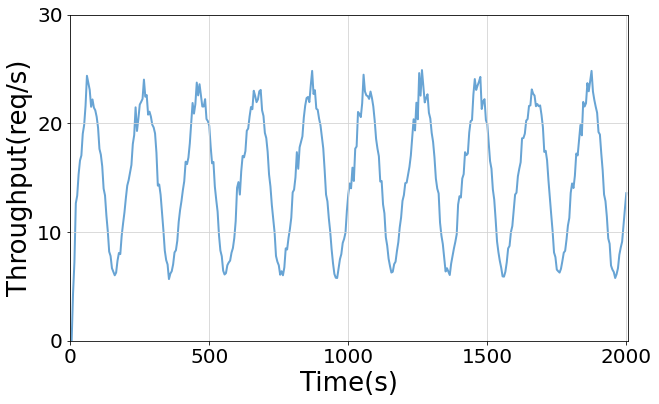

In [12]:
target_index = 0
save_label = save_labels[target_index]

x = average_df['Time(s)']
y = average_df[target_cols[target_index]]
fig = plt.figure(figsize=[10,6])
ax = plt.subplot(111)
ax.grid(True)
plt.grid(True, color='lightgray')
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

#define plots
p = ax.plot(x, 
           y, 
           linestyle='solid', 
           color='#68A4D4',
           linewidth=2,
           label=target_labels[target_index],
           zorder=1,
           alpha=1
           )

up, down, step = 0,0,0
if target_cols[target_index] == '#Users':
    up = 80
    step = 20
elif target_cols[target_index] == 'Response':
    up = 30
    step = 10
elif target_cols[target_index] == '#Cores':
    up = 180
    step = 40

# set axis limits
ax.set_yscale('linear')
ax.set_xlim(-2, int(max(x)) + 5)
ax.set_ylim(down, up)
ax.set_yticks(range(0, up+1, step))

# set ticks and labels
ax.set_ylabel(target_labels[target_index], fontsize=26)
ax.set_xlabel('Time(s)', fontsize=26)
ax.set_xticks(range(0, int(max(x)) + 500, 500))
ax.tick_params(axis='both', which='major', labelsize=20)

# legend settings
#ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)

fig.savefig(f'../../phd-thesis/figures/{save_label}.pdf', dpi=300, format='pdf', bbox_inches='tight')
